# Project 2: Multiple Linear Regression

## Setup

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Step 1: Define function_1 to estimate the coefficients (weights) for multiple regression, return the training & testing RSS

In [2]:
# weight, train_rss_history, test_rss_history = 
# function(train_feature, train_output, test_feature, test_output, weight0, learning_rate, tolerance)

def function_1(train_feature, train_output, test_feature, test_output, weight0, learning_rate, tolerance):
    
    # Adding a column of 1s to input_feature 
    train_feature = np.c_[np.ones(train_feature.shape[0]),train_feature]
    test_feature = np.c_[np.ones(test_feature.shape[0]),test_feature]

    
    # history of weights
    w_history = []
    
    # history of cost functions
    train_rss_history = []
    test_rss_history = []
    
    # initial weight & tolerance
    weight = weight0
    tolerance_k = 10*tolerance

    while tolerance_k > tolerance:
        #Save weights for each iteration.
        w_history.append(weight)
        
        train_error = train_output - np.dot(train_feature,weight)
        test_error = test_output - np.dot(test_feature,weight)

        train_rss = np.sum(train_error ** 2) / (train_output.shape[0])
        test_rss = np.sum(test_error ** 2) / (test_output.shape[0])

        
        #Save weights for each iteration.
        train_rss_history.append(train_rss)
        test_rss_history.append(test_rss)
        
        #Calculate the gradiant.
        J = -train_feature.T.dot(train_error) * 2
        
        # update tolerance
        tolerance_k = (np.sum(J ** 2))**0.5
        
        #update weights
        weight = weight - learning_rate * J 
        
    train_rss_history = np.array(train_rss_history)
    test_rss_history = np.array(test_rss_history)

    
    return weight, train_rss_history, test_rss_history

## Step 2: Define function_2 to predict the model output

In [3]:
# predicted_output = function_2(input_feature, weight)

def function_2(input_feature, weight):
    
    # Adding a column of 1s to input_feature 
    input_feature = np.c_[np.ones(input_feature.shape[0]),input_feature]
    
    # Computing predicted_output
    predicted_output = np.dot(input_feature, weight)
    
    return predicted_output

## Step 3: Define function_3 to calculate the model RSS

In [4]:
# RSS = function_3(input_feature, output, weight):

def function_3(input_feature, output, weight):
    
    # Adding a column of 1s to input_feature 
    input_feature = np.c_[np.ones(input_feature.shape[0]),input_feature]
    
    # Computing predicted_output
    predicted_output = np.dot(input_feature, weight)
    
    # Computing error and RSS
    error = predicted_output - output
    RSS = np.dot(error,error) / error.shape[0]
    
    return RSS

## Step 4: Import fish data from Fish.csv

In [5]:
# Importing fish data from Fish.csv
df = pd.read_csv (r'../data/Fish.csv')   
print(f'Fish data imported with following columns \n {list(df.columns)}')

# Converting Panda data to Numpy data
data = df.to_numpy()
fish_weights = data[:,1].astype(np.float32)
fish_features = data[:,2:7].astype(np.float32)

# Spliting train and test data to train_feature, test_feature, train_output, test_output
N = data.shape[0]
train_idx = np.arange(int(0.8*N))
test_idx = np.arange(int(0.8*N),N)

train_data = data[train_idx,:]
test_data = data[test_idx,:]

# Saving input features and output weigth separately
train_output = train_data[:,1].astype(np.float32)
test_output = test_data[:,1].astype(np.float32)

all_train_feature = train_data[:,2:].astype(np.float32)
all_test_feature = test_data[:,2:].astype(np.float32)

Fish data imported with following columns 
 ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


## Step 5: Use function_1 to estimate coefficients, train & test RSS for models

### Section 5: Model 1

Model 1 (feature = Length1) Performance: 
 Final Training RSS = 17581.298957114424; Final Testing RSS = 266075.37958253326; 


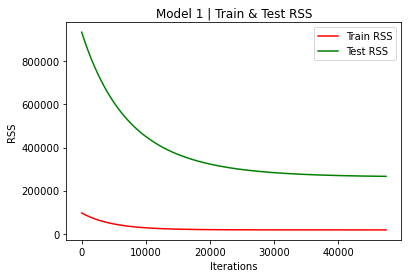

In [6]:
# Section 5: Model 1

# Preparing data for model
# all_features: 'Length1', 'Length2', 'Length3', 'Height', 'Width'
# already splitted train_feature, train_output, test_feature, test_output 
# feature = 'Length1'
train_feature = all_train_feature[:,0]
test_feature = all_test_feature[:,0]

# Defining constants
w0 = np.array([-7.5, 1])
learning_rate = 7e-10 # 7e-10
tolerance = 1.4e4
w, train_rss_history, test_rss_history = \
function_1(train_feature, train_output, test_feature, test_output, w0, learning_rate, tolerance)

# Saving train & test RSS for all models for question 4
all_train_rss = np.zeros([8,1])
all_train_rss[0] = train_rss_history[-1]
all_test_rss = np.zeros([8,1])
all_test_rss[0] = test_rss_history[-1]

# print Model Performance
print(f'Model 1 (feature = Length1) Performance: \n Final Training RSS = {train_rss_history[-1]}; Final Testing RSS = {test_rss_history[-1]}; ')

# plot Train & Test RSS
k = train_rss_history.shape[0]
plt.plot(np.arange(k), train_rss_history,'r-', label='Train RSS')
plt.plot(np.arange(k),  test_rss_history,'g-', label='Test RSS')

plt.title('Model 1 | Train & Test RSS')
plt.xlabel('Iterations')
plt.ylabel('RSS')
plt.legend()
plt.savefig('../results/Model 1_RSS.png')
plt.show()

### Section 5: Model 2

Model 2 (feature = Length1, Width) Performance: 
 Final Training RSS = 17379.31570282684; Final Testing RSS = 264618.1319106451; 


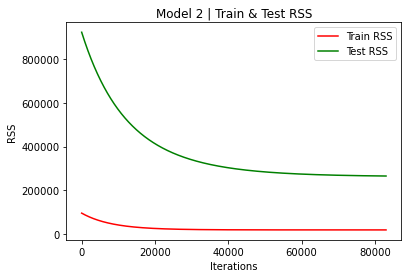

In [7]:
# Section 5: Model 2

# Preparing data for model
# all_features: 'Length1', 'Length2', 'Length3', 'Height', 'Width'
# already splitted train_feature, train_output, test_feature, test_output 
# feature = 'Length1', 'Width'
train_feature = all_train_feature[:, [0,4]]
test_feature = all_test_feature[:, [0,4]]

# Defining constants
w0 = np.array([-8.5, 1, 1])
learning_rate = 4e-10 # 4e-10
tolerance = 1.4e4
w, train_rss_history, test_rss_history = \
function_1(train_feature, train_output, test_feature, test_output, w0, learning_rate, tolerance)

# Saving train & test RSS for all models for question 4
all_train_rss[1] = train_rss_history[-1]
all_test_rss[1] = test_rss_history[-1]

# print Model Performance
print(f'Model 2 (feature = Length1, Width) Performance: \n Final Training RSS = {train_rss_history[-1]}; Final Testing RSS = {test_rss_history[-1]}; ')

# plot Train & Test RSS
k = train_rss_history.shape[0]
plt.plot(np.arange(k), train_rss_history,'r-', label='Train RSS')
plt.plot(np.arange(k),  test_rss_history,'g-', label='Test RSS')

plt.title('Model 2 | Train & Test RSS')
plt.xlabel('Iterations')
plt.ylabel('RSS')
plt.legend()
plt.savefig('../results/Model 2_RSS.png')
plt.show()

### Section 5: Model 3

Model 3 (feature = Length1, Height, Width) Performance: 
 Final Training RSS = 12368.671331901796; Final Testing RSS = 281360.09351580555; 


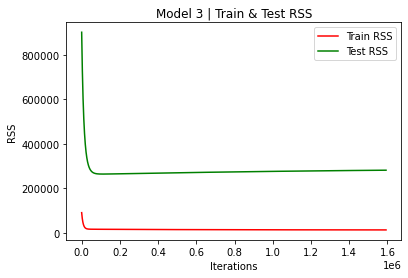

In [8]:
# Section 5: Model 3

# Preparing data for model
# all_features: 'Length1', 'Length2', 'Length3', 'Height', 'Width'
# already splitted train_feature, train_output, test_feature, test_output 
# feature = 'Length1', 'Height', 'Width'
train_feature = all_train_feature[:, [0,3,4]]
test_feature = all_test_feature[:, [0,3,4]]

# Defining constants
w0 = np.array([-10, 1, 1, 1])
learning_rate = 4e-10 # 4e-10
tolerance = 1.4e4
w, train_rss_history, test_rss_history = \
function_1(train_feature, train_output, test_feature, test_output, w0, learning_rate, tolerance)

# Saving train & test RSS for all models for question 4
all_train_rss[2] = train_rss_history[-1]
all_test_rss[2] = test_rss_history[-1]

# print Model Performance
print(f'Model 3 (feature = Length1, Height, Width) Performance: \n Final Training RSS = {train_rss_history[-1]}; Final Testing RSS = {test_rss_history[-1]}; ')

# plot Train & Test RSS
k = train_rss_history.shape[0]
plt.plot(np.arange(k), train_rss_history,'r-', label='Train RSS')
plt.plot(np.arange(k),  test_rss_history,'g-', label='Test RSS')

plt.title('Model 3 | Train & Test RSS')
plt.xlabel('Iterations')
plt.ylabel('RSS')
plt.legend()
plt.savefig('../results/Model 3_RSS.png')
plt.show()

## Step 6: Use Scikit Learn linear regression functions to obtain predicted output, train & test RSS

Model 2-degree Performance: 
 Final Training RSS = 9955.456692913385; Final Testing RSS = 151561.734375; 
 

Model 3-degree Performance: 
 Final Training RSS = 6788.675196850394; Final Testing RSS = 1010111.375; 
 

Model 4-degree Performance: 
 Final Training RSS = 6788.006889763779; Final Testing RSS = 1127852.375; 
 

Model 5-degree Performance: 
 Final Training RSS = 6545.396653543307; Final Testing RSS = 156814.75; 
 

Model 6-degree Performance: 
 Final Training RSS = 6883.890255905511; Final Testing RSS = 649707.75; 
 



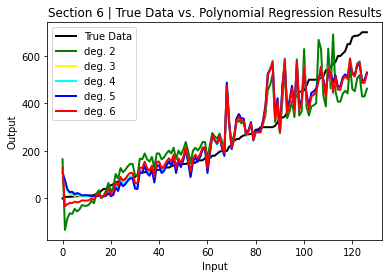

In [9]:
# Preparing data for model
# all_features: 'Length1', 'Length2', 'Length3', 'Height', 'Width'
# already splitted train_feature, train_output, test_feature, test_output 
# feature = 'Length1'
train_feature = all_train_feature[:, 0]
test_feature = all_test_feature[:, 0]


train_rss_history = []
test_rss_history = []
colors = ['green', 'yellow', 'cyan', 'blue', 'red', 'black']
N = train_output.shape[0]
plt.plot(np.arange(N),  train_output, color=colors[-1], linewidth=2, label="True Data")

for count, degree in enumerate([2, 3, 4, 5, 6]):
    
    poly = PolynomialFeatures(degree = degree)
    poly_train_feature = poly.fit_transform(train_feature[:, np.newaxis])
    poly_test_feature = poly.fit_transform(test_feature[:, np.newaxis])


    reg = LinearRegression().fit(poly_train_feature, train_output)

    train_error = train_output - reg.predict(poly_train_feature)
    test_error = test_output - reg.predict(poly_test_feature)
    
    train_rss = np.sum(train_error ** 2) / (train_output.shape[0])
    test_rss = np.sum(test_error ** 2) / (test_output.shape[0])

    train_rss_history.append(train_rss)
    test_rss_history.append(test_rss)


    # Saving train & test RSS for all models for section 6
    all_train_rss[degree+1] = train_rss
    all_test_rss[degree+1] = test_rss
    
    # print Model Performance
    print(f'Model {degree}-degree Performance: \n Final Training RSS = {train_rss_history[-1]}; Final Testing RSS = {test_rss_history[-1]}; \n \n')
    
    # plot Train & Test RSS
    plt.plot(np.arange(N), reg.predict(poly_train_feature), color=colors[count], linewidth=2, label="deg. %d" % degree)



plt.title('Section 6 | True Data vs. Polynomial Regression Results')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.savefig('../results/Section 6_output.png')
plt.show()

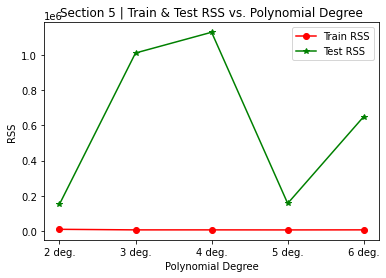

In [10]:
# plot Train & Test RSS vs. Polynomial Degree
train_rss_history = np.array(train_rss_history)
test_rss_history = np.array(test_rss_history)
                                 
plt.plot(np.arange(5), train_rss_history,'r-o', label='Train RSS')
plt.plot(np.arange(5),   test_rss_history,'g-*', label='Test RSS')
plt.xticks(np.arange(5), ('2 deg.', '3 deg.', '4 deg.', '5 deg.', '6 deg.'))
plt.title('Section 5 | Train & Test RSS vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('RSS')
plt.legend()
plt.savefig('../results/Section 6_RSS.png')
plt.show()

## Step 7: Compare and plot Train & Test RSS vs. Model degree

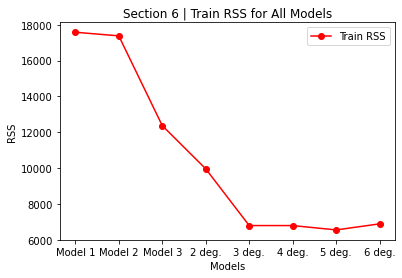

In [11]:
# Section 7 - Part 1: Train RSS vs. models

# plot Train RSS vs. models
plt.plot(np.arange(8), all_train_rss,'r-o', label='Train RSS')

plt.xticks(np.arange(8), ('Model 1', 'Model 2', 'Model 3', '2 deg.', '3 deg.', '4 deg.', '5 deg.', '6 deg.'))
plt.title('Section 6 | Train RSS for All Models')
plt.xlabel('Models')
plt.ylabel('RSS')
plt.legend()
plt.savefig('../results/Section 7_1_RSS.png')
plt.show()

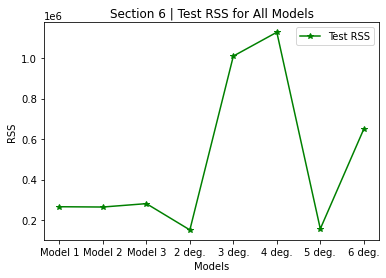

In [12]:
# Section 7 - Part 2: Test RSS vs. models

# plot Train RSS vs. models
plt.plot(np.arange(8),   all_test_rss,'g-*', label='Test RSS')

plt.xticks(np.arange(8), ('Model 1', 'Model 2', 'Model 3', '2 deg.', '3 deg.', '4 deg.', '5 deg.', '6 deg.'))
plt.title('Section 6 | Test RSS for All Models')
plt.xlabel('Models')
plt.ylabel('RSS')
plt.legend()
plt.savefig('../results/Section 7_2_RSS.png')
plt.show()